## Import Libraries

In [1]:
import sys
import os
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$CONDA_PREFIX/lib/
os.chdir("/home/medha/ScratchPad/MEMTrack")
!pwd
sys.path.insert(1, ".")
sys.path.insert(1, "./src/")

/home/medha/ScratchPad/MEMTrack


In [3]:
from data_prep_utils import process_data
from data_feature_gen import create_train_data, create_test_data

## Update Data Paths

In [4]:
src = "raw_data/"
folder = "Agar_Control_1"
final_data_dir = "data/"
out_sub_dir = "collagen"

In [5]:
target_data_sub_dir = os.path.join(final_data_dir, out_sub_dir)
dest_sub_dir = "DataFeatures" # directory to store processed videos
# test_video_list = ["video1"] # list of videos to generate features for, ideally run for video numbers in video_nums
exp_name = "collagen_motility_inference" # name of experiment

## Run Preprocessing Code

In [6]:
video_num = process_data(folder, src, final_data_dir, out_sub_dir, csv_file_name="RawData2.xlsx")
print("Video Number: ", video_num)
video_nums=[video_num]

target_data_sub_dir:  data/collagen
video_map_path:  data/videomap.txt
data dirs:  ['data/videomap.txt', 'data/collagen', 'data/sample_videomap.txt']
last video num:  1
curr video num:  2
Added to videomap
['Nr', 'TID', 'PID', 'x [pixel]', 'y [pixel]', 'E/H']
img_id: 2
Annotations processed
raw_data/Agar_Control_1/RawData2.csv
['Nr', 'TID', 'PID', 'x [pixel]', 'y [pixel]', 'E/H']
2
3
4
1
[['1', '1', '1', '73.461', '454.566', 'E'], ['2', '1', '2', '74.488', '455.593', 'E'], ['3', '1', '3', '72.947', '456.621', 'E'], ['4', '1', '4', '73.461', '455.08', 'E'], ['5', '1', '5', '73.461', '456.107', 'E'], ['6', '1', '6', '71.92', '455.593', 'E']]
Video 2 processed
Video Number:  2


In [7]:
#### to run for all videos in a folder
# video_list = os.listdir(src)
# video_nums=[]

# for video in video_list[2:]:
#     video_num = process_data(video, src, final_data_dir, out_sub_dir)
#     video_nums.append(video_num)

In [41]:
video_nums

[2]

In [44]:
test_video_list =  [f"video{str(video_num)}" for video_num in video_nums] 
test_video_list

['video2']

## Run Feature Generation Code

In [11]:
create_test_data(target_data_sub_dir, dest_sub_dir, exp_name, test_video_list)

video2
data/collagen/video2/frame1video.mp4
100
99


In [12]:
! ls ./DataFeatures/collagen_motility_inference

data_video1_feature_optical_flow_median_back_2pyr_18win_background_img
data_video2_feature_optical_flow_median_back_2pyr_18win_background_img


## Run Inference code for Object Detection

In [13]:
data_path = os.path.join(dest_sub_dir, exp_name )

#path to saved models
no_motility_model_path="./models/motility/no/collagen_optical_flow_median_bkg_more_data_90k/"
low_motility_model_path="./models/motility/low/collagen_optical_flow_median_bkg_more_data_90k/"
mid_motility_model_path="./models/motility/mid/collagen_optical_flow_median_bkg_more_data_90k/"
high_motility_model_path="./models/motility/high/collagen_optical_flow_median_bkg_more_data_90k/"


#update test video numbers from video map
for video_num in video_nums:
   #To genearate testing files for all motilities
      !python ./src/inferenceBacteriaRetinanet_Motility_v2.py  --output_dir $low_motility_model_path   --annotations_test "All" --video $video_num   --test_dir $data_path

      !python  ./src/inferenceBacteriaRetinanet_Motility_v2.py  --output_dir $mid_motility_model_path  --annotations_test "Motility-mid" --video $video_num --test_dir $data_path

      !python  ./src/inferenceBacteriaRetinanet_Motility_v2.py  --output_dir $high_motility_model_path --annotations_test "Motility-high" --video $video_num --test_dir $data_path

      !python  ./src/inferenceBacteriaRetinanet_Motility_v2.py  --output_dir $low_motility_model_path  --annotations_test "Motility-low" --video $video_num --test_dir $data_path


Loading config /home/medha/.conda/envs/memtrack2/lib/python3.8/site-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.
./models/motility/low/collagen_optical_flow_median_bkg_more_data_90k/model_0089999.pth
[09/12 17:45:48 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./models/motility/low/collagen_optical_flow_median_bkg_more_data_90k/model_0089999.pth ...
WARNING [09/12 17:45:48 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[09/12 17:45:48 d2.evaluation.coco_evaluation]: Trying to convert 'boardetect_test' to COCO format ...
[09/12 17:45:48 d2.data.datasets.coco]: Converting annotations of dataset 'boardetect_test' to COCO format ...)
[09/12 17:45:49 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[09/12 17:45:49 d2.data.datase

/home/medha/.conda/envs/memtrack2/lib/python3.8/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[09/12 17:46:08 d2.evaluation.evaluator]: Inference done 11/99. Dataloading: 0.0007 s/iter. Inference: 0.0385 s/iter. Eval: 0.0002 s/iter. Total: 0.0393 s/iter. ETA=0:00:03
[09/12 17:46:11 d2.evaluation.evaluator]: Total inference time: 0:00:03.543211 (0.037694 s / iter per device, on 1 devices)
[09/12 17:46:11 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.034140 s / iter per device, on 1 devices)
[09/12 17:46:11 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[09/12 17:46:11 d2.evaluation.coco_evaluation]: Saving results to ./models/motility/mid/collagen_optical_flow_median_bkg_more_data_90k/coco_instances_res

## Run Tracking code

In [56]:
# Tracking where GT is present
# PLease remove --plot_gt if gt is not present
for video_num in  video_nums:
    !python ./src/GenerateTrackingData.py --filter_thresh 0.3 --video_num $video_num --data_path $data_path --conf_score_thres 0.8
    !python ./src/Tracking.py --video_num $video_num  --data_path $data_path --max_age 35 --max_interpolation 35 
    #plot predictions and gt
    !python ./src/TrackingAnalysis.py --video_num $video_num --data_feature_path $data_path  --data_root_path $final_data_dir --plot --plot_gt --min_track_len 55
    !python ./src/GenerateVideo.py --video_num $video_num --fps 60 --data_path $data_path


0.3
{'image_id': 0, 'category_id': 0, 'bbox': [60.04785919189453, 441.34661865234375, 30.173934936523438, 30.1549072265625], 'score': 0.999942421913147, 'diff': 'Motility-high'}
DataFeatures/collagen_motility_inference/data_video2_feature_optical_flow_median_back_2pyr_18win_background_img/test/./video2_predictions.json
DataFeatures/collagen_motility_inference/data_video2_feature_optical_flow_median_back_2pyr_18win_background_img/test//images/
Total tracking data:  559
----------------------------------------------------------
sample track id list in dict:  [{'image_id': 0, 'category_id': 0, 'bbox': [60, 441, 30, 30], 'score': -1, 'track_label': '1'}, {'image_id': 1, 'category_id': 0, 'bbox': [58, 442, 31, 30], 'score': -1, 'track_label': '1'}]
----------------------------------------------------------
dict track id keys:  dict_keys(['3', '2', '1', '4', '5', '7', '6', '8', '10', '9', '11'])
----------------------------------------------------------
Number of unique track ids:  11
------

video_num: 2


## Vizualize Results

*Download tracked video from:*

`DataFeatures/collagen_motility_inference/data_video<num>_feature_optical_flow_median_back_2pyr_18win_background_img/video<num>-tracklets-filtered-60.mp4`

*Download tracked coordinates from:*

`DataFeatures/collagen_motility_inference/data_video<num>_feature_optical_flow_median_back_2pyr_18win_background_img/test/TrackedRawData_60.csv`

`TrackedRawData_60.csv` contains tracks that have atleast 60 frames tracked and `TrackedRawData_all.csv` conatins all tracks.

`DataFeatures/collagen_motility_inference/data_video<num>_feature_optical_flow_median_back_2pyr_18win_background_img/test/tracklets-filtered` has all the frames with predicted bacteria plotted

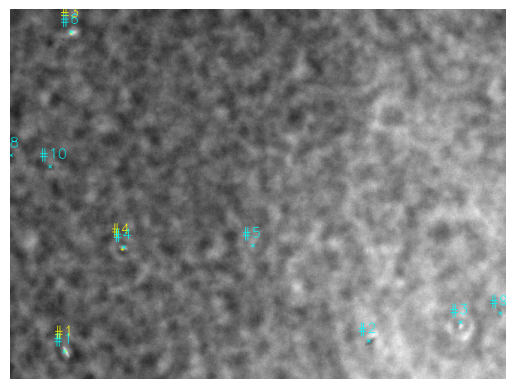

In [57]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("DataFeatures/collagen_motility_inference/data_video2_feature_optical_flow_median_back_2pyr_18win_background_img/test/tracklets-filtered/9.png")
plt.imshow(img)
plt.axis('off')
plt.show()

## Evaluation 

Only possible if GT is present

In [ ]:
video_map_path="./data/videomap.txt" # path to video map

for video_num in video_nums:
     !python src/evaluation_step_wise_motility.py --video_map_path $video_map_path --data_path $data_path --video $video_num --all_labels_file "All"